# 6.6 Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Life Expectancy Data

## 1. Importing your libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [2]:
# Define path
path = r'/Users/sydneyhoy/Documents/Data Immersion/Achievement 6/World Life Expectancy Analysis'

In [3]:
# Import life expectancy dataset
life_expectancy = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'life_expectancy_clean.csv'), index_col = False)

In [4]:
life_expectancy.shape

(2700, 20)

In [5]:
life_expectancy.head()

,Unnamed: 0,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,Measles,BMI,under-five deaths,polio_immunizations,Diphtheria,HIV/AIDS_deaths,GDP,population,thinness 1-19 years,thinness_5-9_years,income_composition_of_resources
0,0,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,492,18.6,86,58,62,0.1,612.696514,327582.0,17.5,17.5,0.476
1,1,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,430,18.1,89,62,64,0.1,631.744976,31731688.0,17.7,17.7,0.470
2,2,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,2787,17.6,93,67,67,0.1,669.959000,3696958.0,17.9,18.0,0.463
3,3,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,3013,17.2,97,68,68,0.1,63.537231,2978599.0,18.2,18.2,0.454
4,4,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,1989,16.7,102,66,66,0.1,553.328940,2883167.0,18.4,18.4,0.448


In [6]:
life_expectancy['year'] = life_expectancy['year'].astype('str')

## 2. Subsetting time-series data

In [7]:
# create a subset of life_expectancy data
data_sub = life_expectancy[['year','life_expectancy']]

In [8]:
data_sub

,year,life_expectancy
0,2014,59.9
1,2013,59.9
2,2012,59.5
3,2011,59.2
4,2010,58.8
...,...,...
2695,2004,44.3
2696,2003,44.5
2697,2002,44.8
2698,2001,45.3


In [9]:
# aggregate by year
data_sub_agg = data_sub.groupby(['year']).mean()

In [10]:
data_sub_agg.shape

(15, 1)

In [11]:
data_sub_agg.columns

Index(['life_expectancy'], dtype='object')

In [12]:
# Reset index so that you can use the "year" column as a filter

data_sub_agg2 = data_sub_agg.reset_index()

In [13]:
data_sub_agg2.head()

,year,life_expectancy
0,2000,66.960000
1,2001,67.328333
2,2002,67.532778
3,2003,67.620000
4,2004,67.872222


In [14]:
# Set the "year" column as the index

from datetime import datetime
from datetime import date

data_sub_agg2['datetime'] = pd.to_datetime(data_sub_agg2['year']) # Create a datetime column from "Date.""
data_sub_agg2 = data_sub_agg2.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub_agg2.drop(['year'], axis=1, inplace=True) # Drop the "Date" column.
data_sub_agg2.head()

,life_expectancy
datetime,
2000-01-01,66.960000
2001-01-01,67.328333
2002-01-01,67.532778
2003-01-01,67.620000
2004-01-01,67.872222


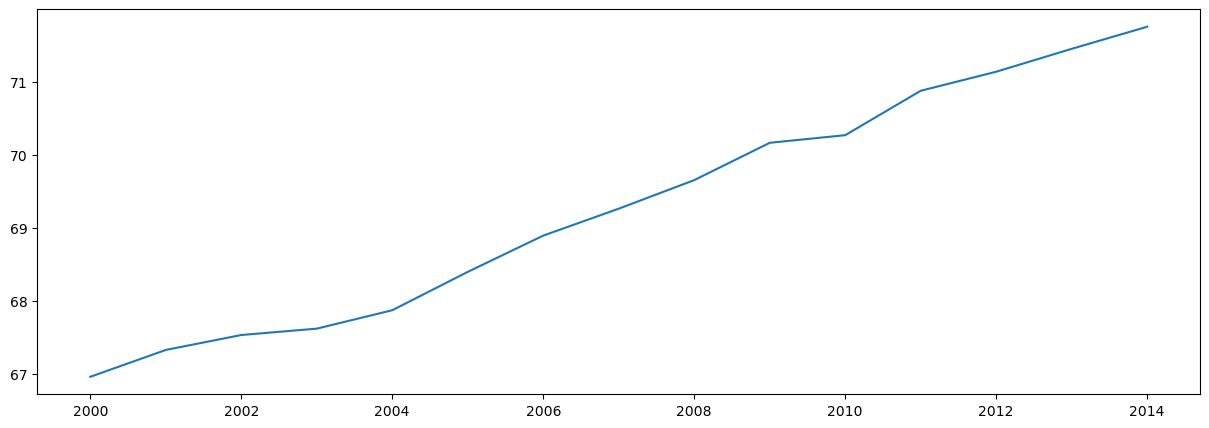

In [15]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub_agg2)

## 3. Time-series analysis: decomposition

In [16]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub_agg2, model='additive')

In [17]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

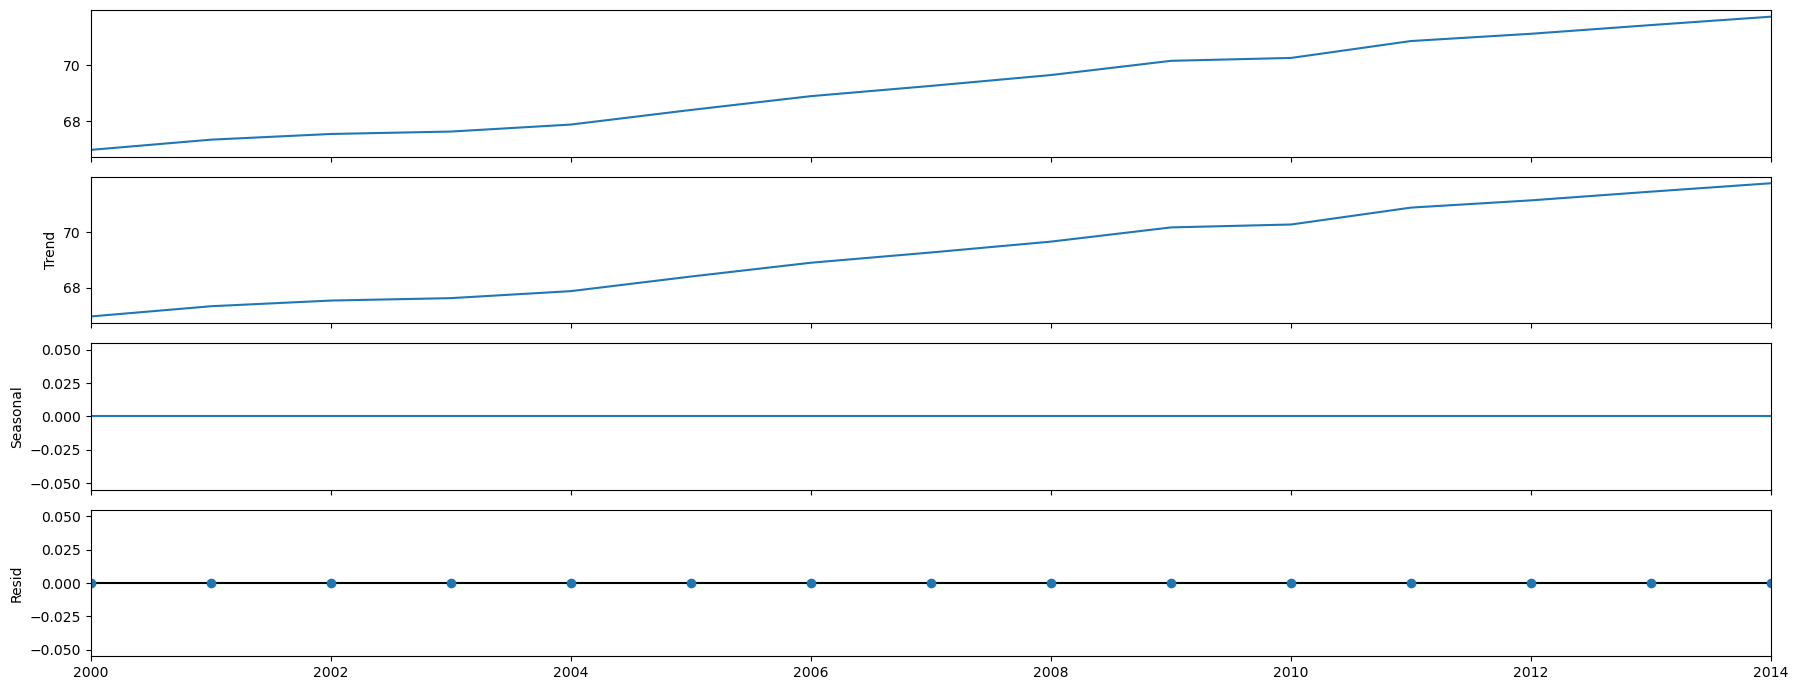

In [18]:
# Plot the separate components

decomposition.plot()
plt.show()

The first two graph indicate that the data is trending up every year, since the data didn't have any noise the trend and level are the same. There is no seasonality to this data since it is yearly and seasonality would occure if data was collected over months rather than just yearly. The resudual shows that there is no unexplained noise in this data again most likely because it is collected yearly and there is no room for large variance in the data. 

## 4. Testing for stationarity

In [19]:
# import adfuller function
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub_agg2['life_expectancy'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.902343
p-value                        0.330960
Number of Lags Used            5.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


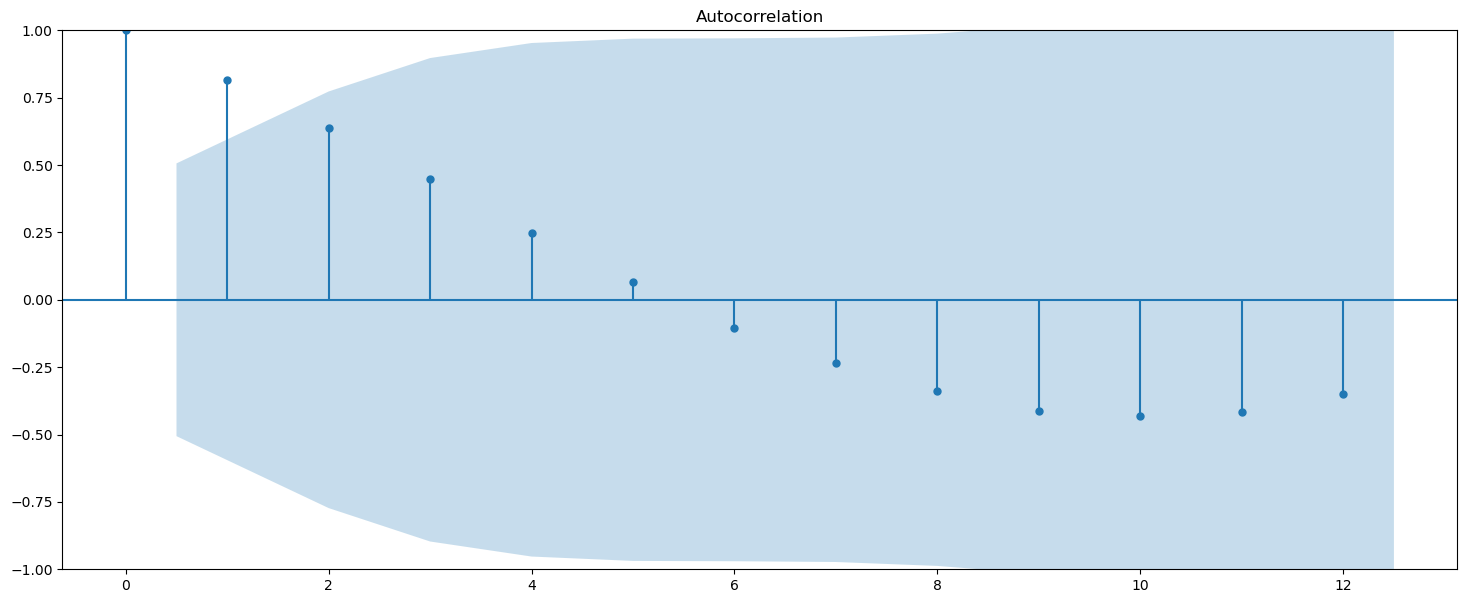

In [20]:
# Check out a plot of autocorrelations
# import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub_agg2)
plt.show()

The dickey-fuller test does not show much autocorreltion since most of the lines are within the confidence interval, however I do know that the data has an upward trend. The test statitistic is also larger than all of the critical values, and a p-value of larger than .05, so the null hypothesis cannot be rejected at this point. I will conntinue with stationarizing the data using differencing.

## 5. Stationarizing the Life Expectancy Data

In [21]:
data_diff = data_sub_agg2 - data_sub_agg2.shift(1)

In [22]:
data_diff.dropna(inplace = True) 

In [23]:
data_diff.head()

,life_expectancy
datetime,
2001-01-01,0.368333
2002-01-01,0.204444
2003-01-01,0.087222
2004-01-01,0.252222
2005-01-01,0.526667


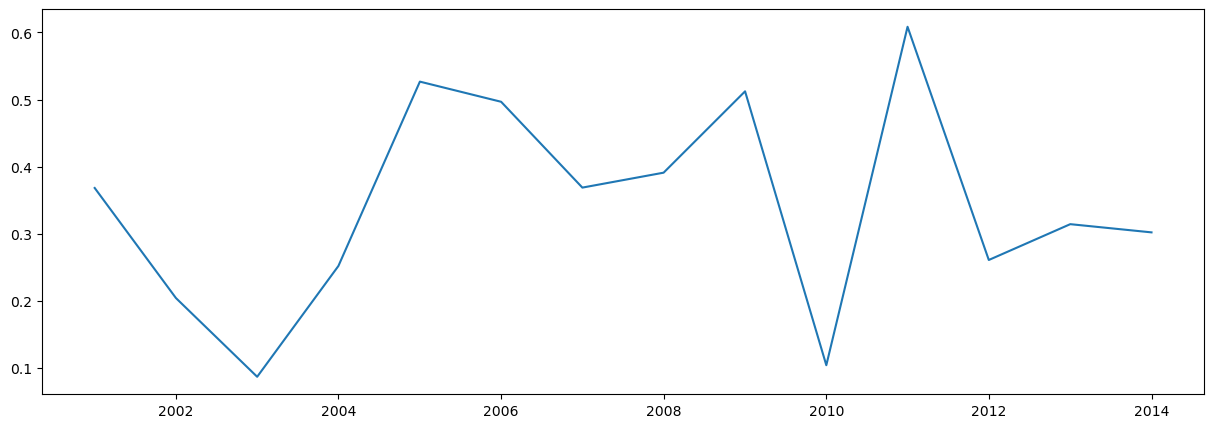

In [24]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [25]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.779594
p-value                         0.003123
Number of Lags Used             0.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


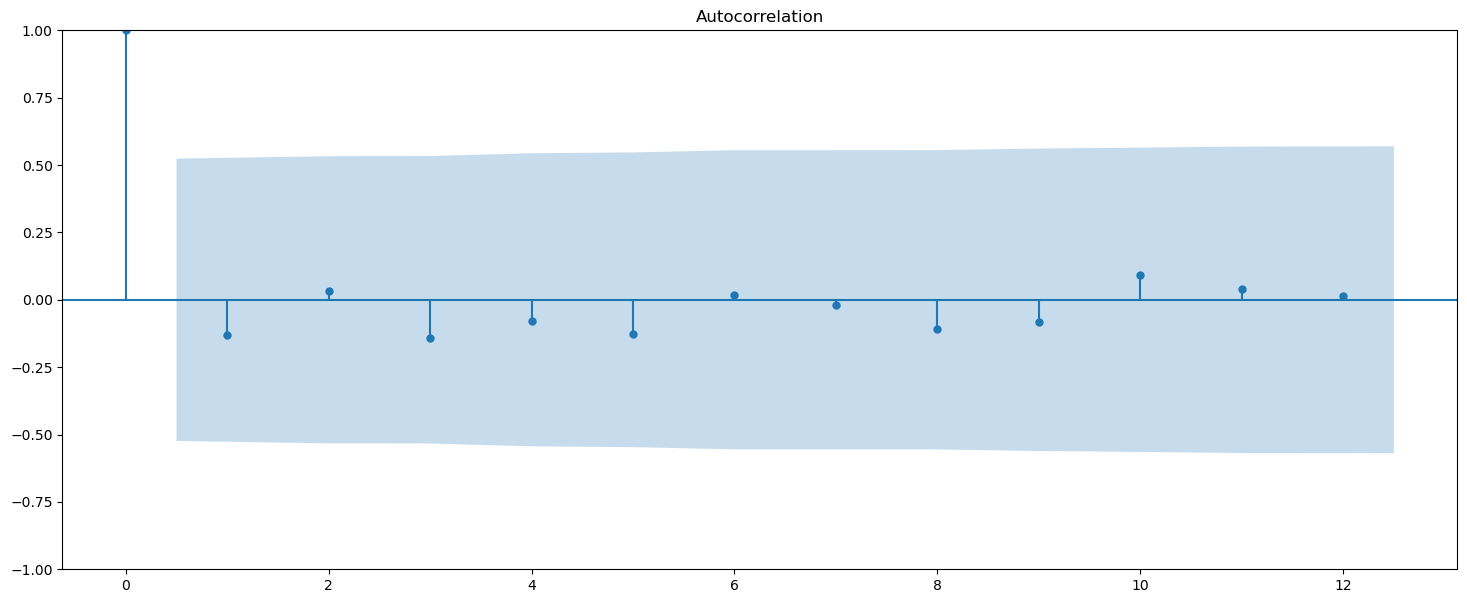

In [26]:
plot_acf(data_diff)
plt.show()

After stationarizing the test statistic is now smaller that the critical value at 10% and the p-value is less that .05, so the null hypothesis can be rejected at 10% significance level. The autocorrelations show that the data is now stationary except for the first line in the graph, but at this point I can be confident that the data has a strong stationarity and can move forward with time-series analysis. 